Load News Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

df = pd.read_csv('../data/raw_analyst_ratings.csv')

#droping nameless index column
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

def remove_timezone(x):
    if isinstance(x, pd.Timestamp) and x.tzinfo is not None:
        return x.tz_convert(None)
    elif isinstance(x, datetime) and x.tzinfo is not None:
        return x.replace(tzinfo=None)
    return x

df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce')
df.dropna(subset=['date'], inplace=True)
df['date'] = df['date'].apply(remove_timezone)

# Set date as index and sort
df.set_index('date', inplace=True)
df.sort_index(inplace=True)
print(df.columns) 
print(df.index) 

df.head(1)

C:\Users\Tinsae D.D\AppData\Local\Temp\ipykernel_5556\1863515706.py:17: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce')


Index(['headline', 'url', 'publisher', 'stock'], dtype='object')
DatetimeIndex(['2009-02-14 00:00:00', '2009-04-27 00:00:00',
               '2009-04-27 00:00:00', '2009-04-29 00:00:00',
               '2009-05-22 00:00:00', '2009-05-27 00:00:00',
               '2009-05-27 00:00:00', '2009-05-27 00:00:00',
               '2009-05-27 00:00:00', '2009-05-27 00:00:00',
               ...
               '2020-06-11 15:32:46', '2020-06-11 16:15:38',
               '2020-06-11 16:24:41', '2020-06-11 16:25:21',
               '2020-06-11 16:30:31', '2020-06-11 16:49:41',
               '2020-06-11 16:51:33', '2020-06-11 17:01:39',
               '2020-06-11 17:11:20', '2020-06-11 17:12:35'],
              dtype='datetime64[ns]', name='date', length=1407328, freq=None)


,headline,url,publisher,stock
date,,,,
2009-02-14,How Treasuries and ETFs Work,https://www.benzinga.com/28044/how-treasuries-...,Paco Ahlgren,NAV


 2. Descriptive Stats: Headline Length

Text(0.5, 1.0, 'Distribution of Headline Lengths')

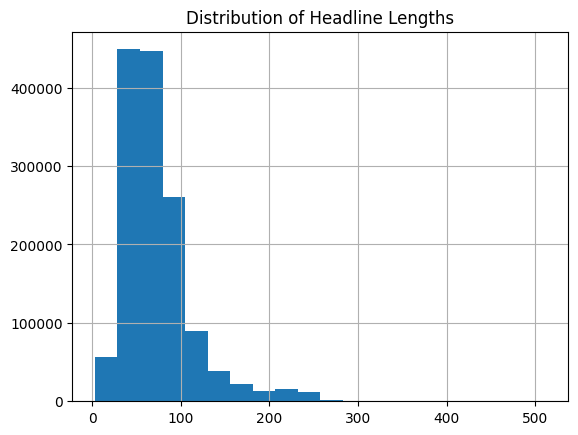

In [14]:
df['headline_length'] = df['headline'].str.len()
df['headline_length'].describe()
df['headline_length'].hist(bins=20)
plt.title("Distribution of Headline Lengths")

3. Articles per Publisher

(array([   0,    1,    2, ..., 1031, 1032, 1033], shape=(1034,)),
 [Text(0, 0, 'Paul Quintaro'),
  Text(1, 0, 'Lisa Levin'),
  Text(2, 0, 'Benzinga Newsdesk'),
  Text(3, 0, 'Charles Gross'),
  Text(4, 0, 'Monica Gerson'),
  Text(5, 0, 'Eddie Staley'),
  Text(6, 0, 'Hal Lindon'),
  Text(7, 0, 'ETF Professor'),
  Text(8, 0, 'Juan Lopez'),
  Text(9, 0, 'Benzinga Staff'),
  Text(10, 0, 'Vick Meyer'),
  Text(11, 0, 'webmaster'),
  Text(12, 0, 'Benzinga_Newsdesk'),
  Text(13, 0, 'Zacks'),
  Text(14, 0, 'Jayson Derrick'),
  Text(15, 0, 'Allie Wickman'),
  Text(16, 0, 'Shanthi Rexaline'),
  Text(17, 0, 'Craig Jones'),
  Text(18, 0, 'Wayne Duggan'),
  Text(19, 0, 'Nelson Hem'),
  Text(20, 0, 'Dwight Einhorn'),
  Text(21, 0, 'Michael J. Zerinskas'),
  Text(22, 0, 'Joe Young'),
  Text(23, 0, 'Javier Hasse'),
  Text(24, 0, 'David Johnson'),
  Text(25, 0, 'Matthew Kennedy'),
  Text(26, 0, 'Forex Live'),
  Text(27, 0, 'Laura Brodbeck'),
  Text(28, 0, 'Scott Rubin'),
  Text(29, 0, "Jake L'Ecuyer"),
 

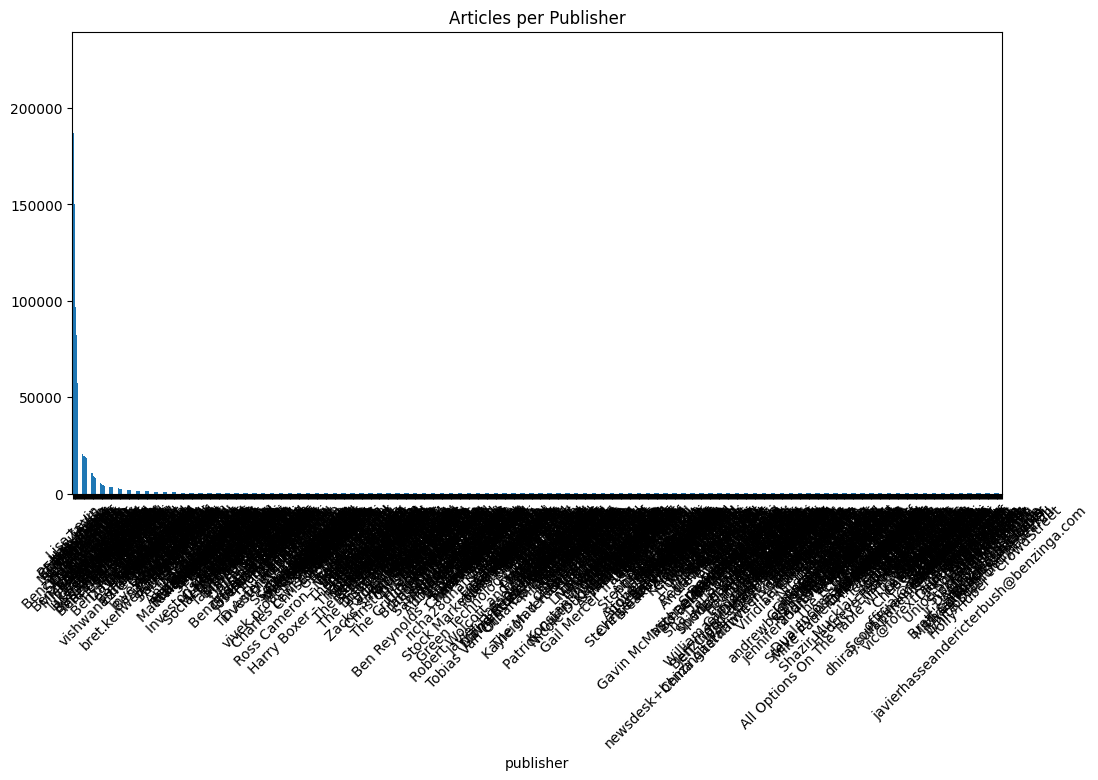

In [15]:
df['publisher'].value_counts().plot(kind='bar', figsize=(12, 6), title='Articles per Publisher')
plt.xticks(rotation=45)

4. Time Series Analysis: Publication Frequency

Text(0, 0.5, 'Article Count')

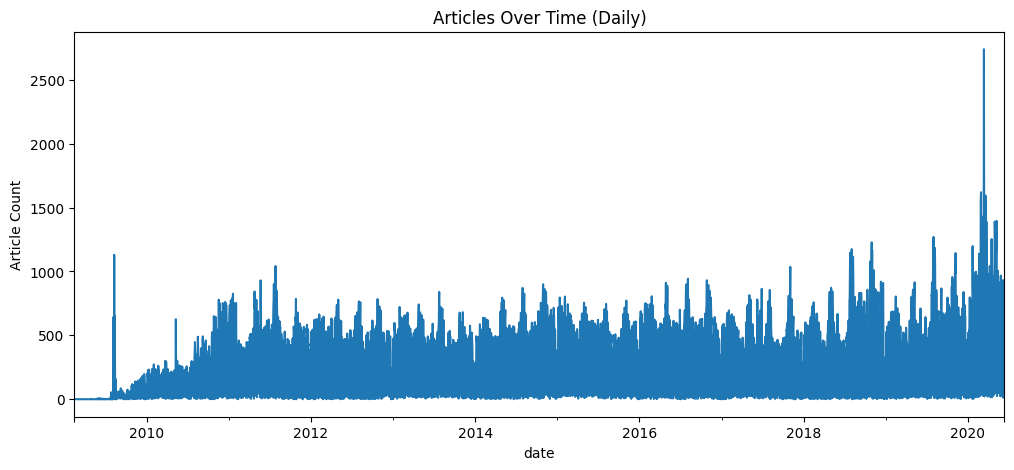

In [16]:
df.resample('D').size().plot(figsize=(12, 5), title='Articles Over Time (Daily)')
plt.ylabel('Article Count')

Time Trends of publish by hour

Text(0, 0.5, 'Count')

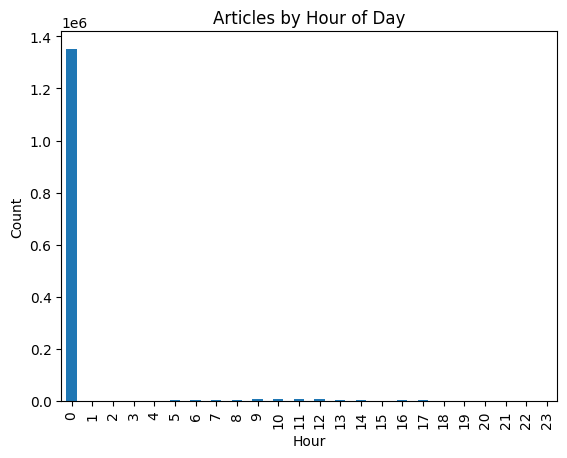

In [ ]:
df['hour'] = df.index.hour
df.groupby('hour').size().plot(kind='bar', title='Articles by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Count')


5. Word Cloud for Headlines (Keywords)

[nltk_data] Downloading package stopwords to C:\Users\Tinsae
[nltk_data]     D.D\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

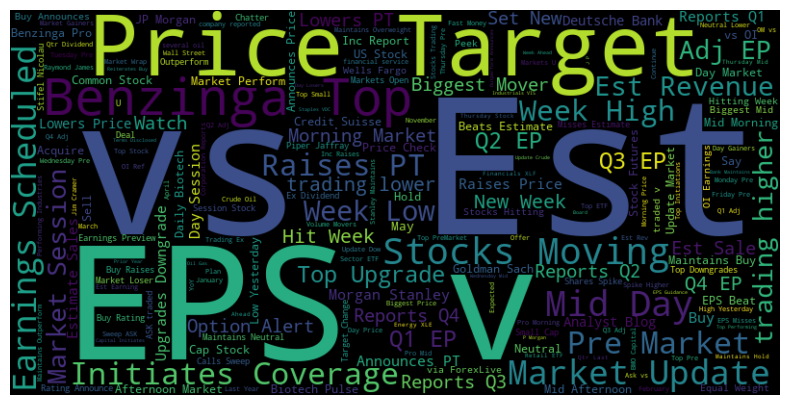

In [18]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk

nltk.download('stopwords')
text = ' '.join(df['headline'].dropna())

wordcloud = WordCloud(stopwords=set(stopwords.words('english')), width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

6. Publisher Analysis: Top Publishers & Domain Extraction

In [ ]:
# Top 10 publishers by article count
top_publishers = df['publisher'].value_counts().head(10)
print("Top 10 Publishers:\n", top_publishers)

df['publisher_domain'] = df['publisher'].apply(
    lambda x: x.split('@')[1] if isinstance(x, str) and '@' in x else None
)

# Top domains
top_domains = df['publisher_domain'].value_counts().head(10)
print("Top 10 Publisher Domains:\n", top_domains)

Top 10 Publishers:
 publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64
Top 10 Publisher Domains:
 publisher_domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
tothetick.com                2
investdiva.com               2
stockmetrix.net              1
forextraininggroup.com       1
eosdetroit.io                1
Name: count, dtype: int64
